In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\kchan\Downloads\archive\India Agriculture Crop Production.csv")
df.shape

(345407, 10)

In [7]:
df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [9]:
pd.isnull(df)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
345402,False,False,True,False,False,True,False,True,False,True
345403,False,False,True,False,False,True,False,True,False,True
345404,False,False,True,False,False,True,False,True,False,True
345405,False,False,True,False,False,True,False,True,False,True


In [10]:
pd.isnull(df).sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
pd.isnull(df).sum()

State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64

In [14]:
df['Production']=df['Production'].astype('int')

In [15]:
df['Production'].dtypes

dtype('int32')

In [16]:
df.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units',
       'Production', 'Production Units', 'Yield'],
      dtype='object')

In [17]:
df.describe()

,Area,Production,Yield
count,3.404140e+05,3.404140e+05,340414.000000
mean,1.182535e+04,9.583711e+05,80.564577
std,4.612484e+04,2.152986e+07,923.232000
min,8.000000e-03,0.000000e+00,0.000000
25%,8.000000e+01,8.700000e+01,0.567920
50%,5.630000e+02,7.170000e+02,1.025000
75%,4.257000e+03,7.176000e+03,2.500000
max,8.580100e+06,1.597800e+09,43958.333333


<Axes: xlabel='Crop', ylabel='count'>

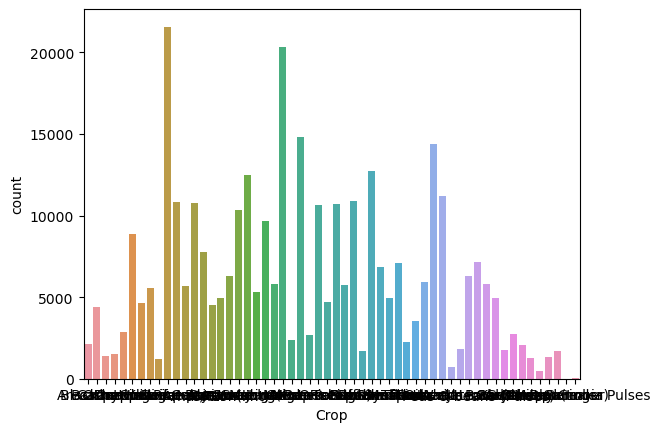

In [18]:
sns.countplot(x='Crop',data=df)

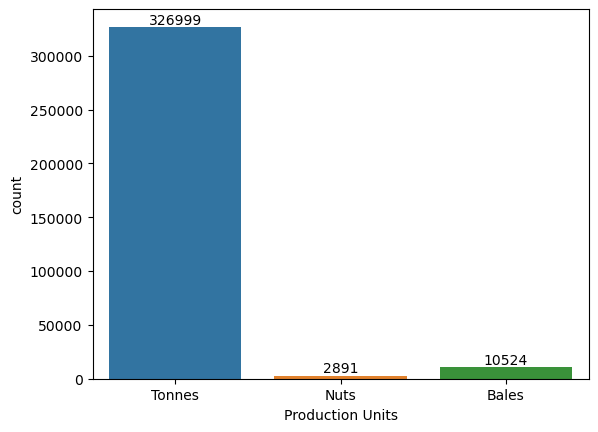

In [19]:
ax=sns.countplot(x='Production Units',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [20]:
df.groupby(['Production Units'],as_index=False)['Production'].sum().sort_values(by='Production',ascending=False)

,Production Units,Production
1,Nuts,310804772578
2,Tonnes,14709792085
0,Bales,728383826


<Axes: xlabel='Production Units', ylabel='Production'>

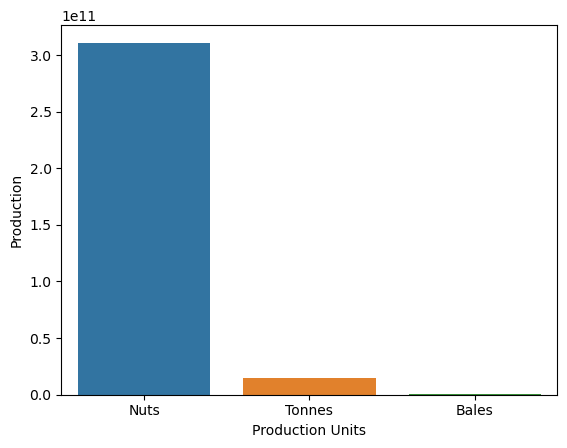

In [21]:
prod_res=df.groupby(['Production Units'],as_index=False)['Production'].sum().sort_values(by='Production',ascending=False)
sns.barplot(x='Production Units',y='Production',data=prod_res)

In [25]:
df.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units',
       'Production', 'Production Units', 'Yield'],
      dtype='object')

<Axes: xlabel='State', ylabel='Production'>

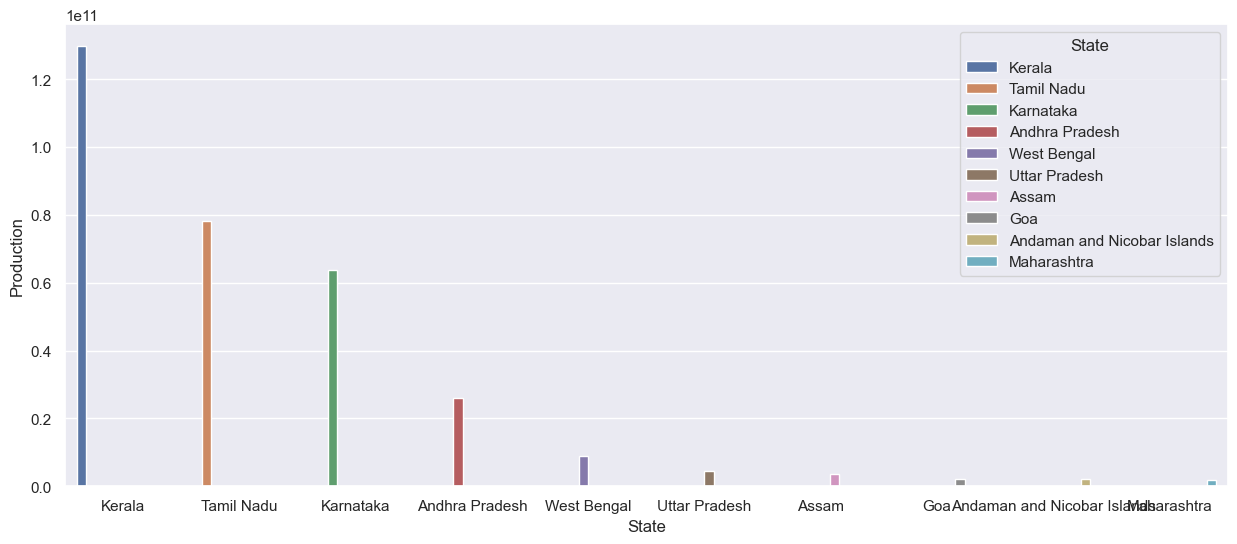

In [37]:
prod_state=df.groupby(['State'],as_index=False)['Production'].sum().sort_values(by='Production',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,6)})
sns.barplot(x='State',y='Production',data=prod_state,hue='State')